In [2]:
#Google Drive link of the data
#https://drive.google.com/file/d/1gnVvImeZpe9Zdhc3PTGLSewmFfQF8tzW/view?usp=sharing

!pip install gdown
import gdown

# Replace 'FILE_ID' with the actual file ID from the shared link
file_id = '1gnVvImeZpe9Zdhc3PTGLSewmFfQF8tzW'  # Example file ID
url = f'https://drive.google.com/uc?id={file_id}'


Downloading...
From: https://drive.google.com/uc?id=1gnVvImeZpe9Zdhc3PTGLSewmFfQF8tzW
To: /content/your_file_name
100%|██████████| 1.87M/1.87M [00:00<00:00, 36.1MB/s]


In [4]:

# Download the file to your Colab environment
gdown.download(url, 'dataset_hourly.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1gnVvImeZpe9Zdhc3PTGLSewmFfQF8tzW
To: /content/dataset_hourly.csv
100%|██████████| 1.87M/1.87M [00:00<00:00, 11.0MB/s]


'dataset_hourly.csv'

250.2704267763044


Text(0.5, 0, 'Time (Hours)')

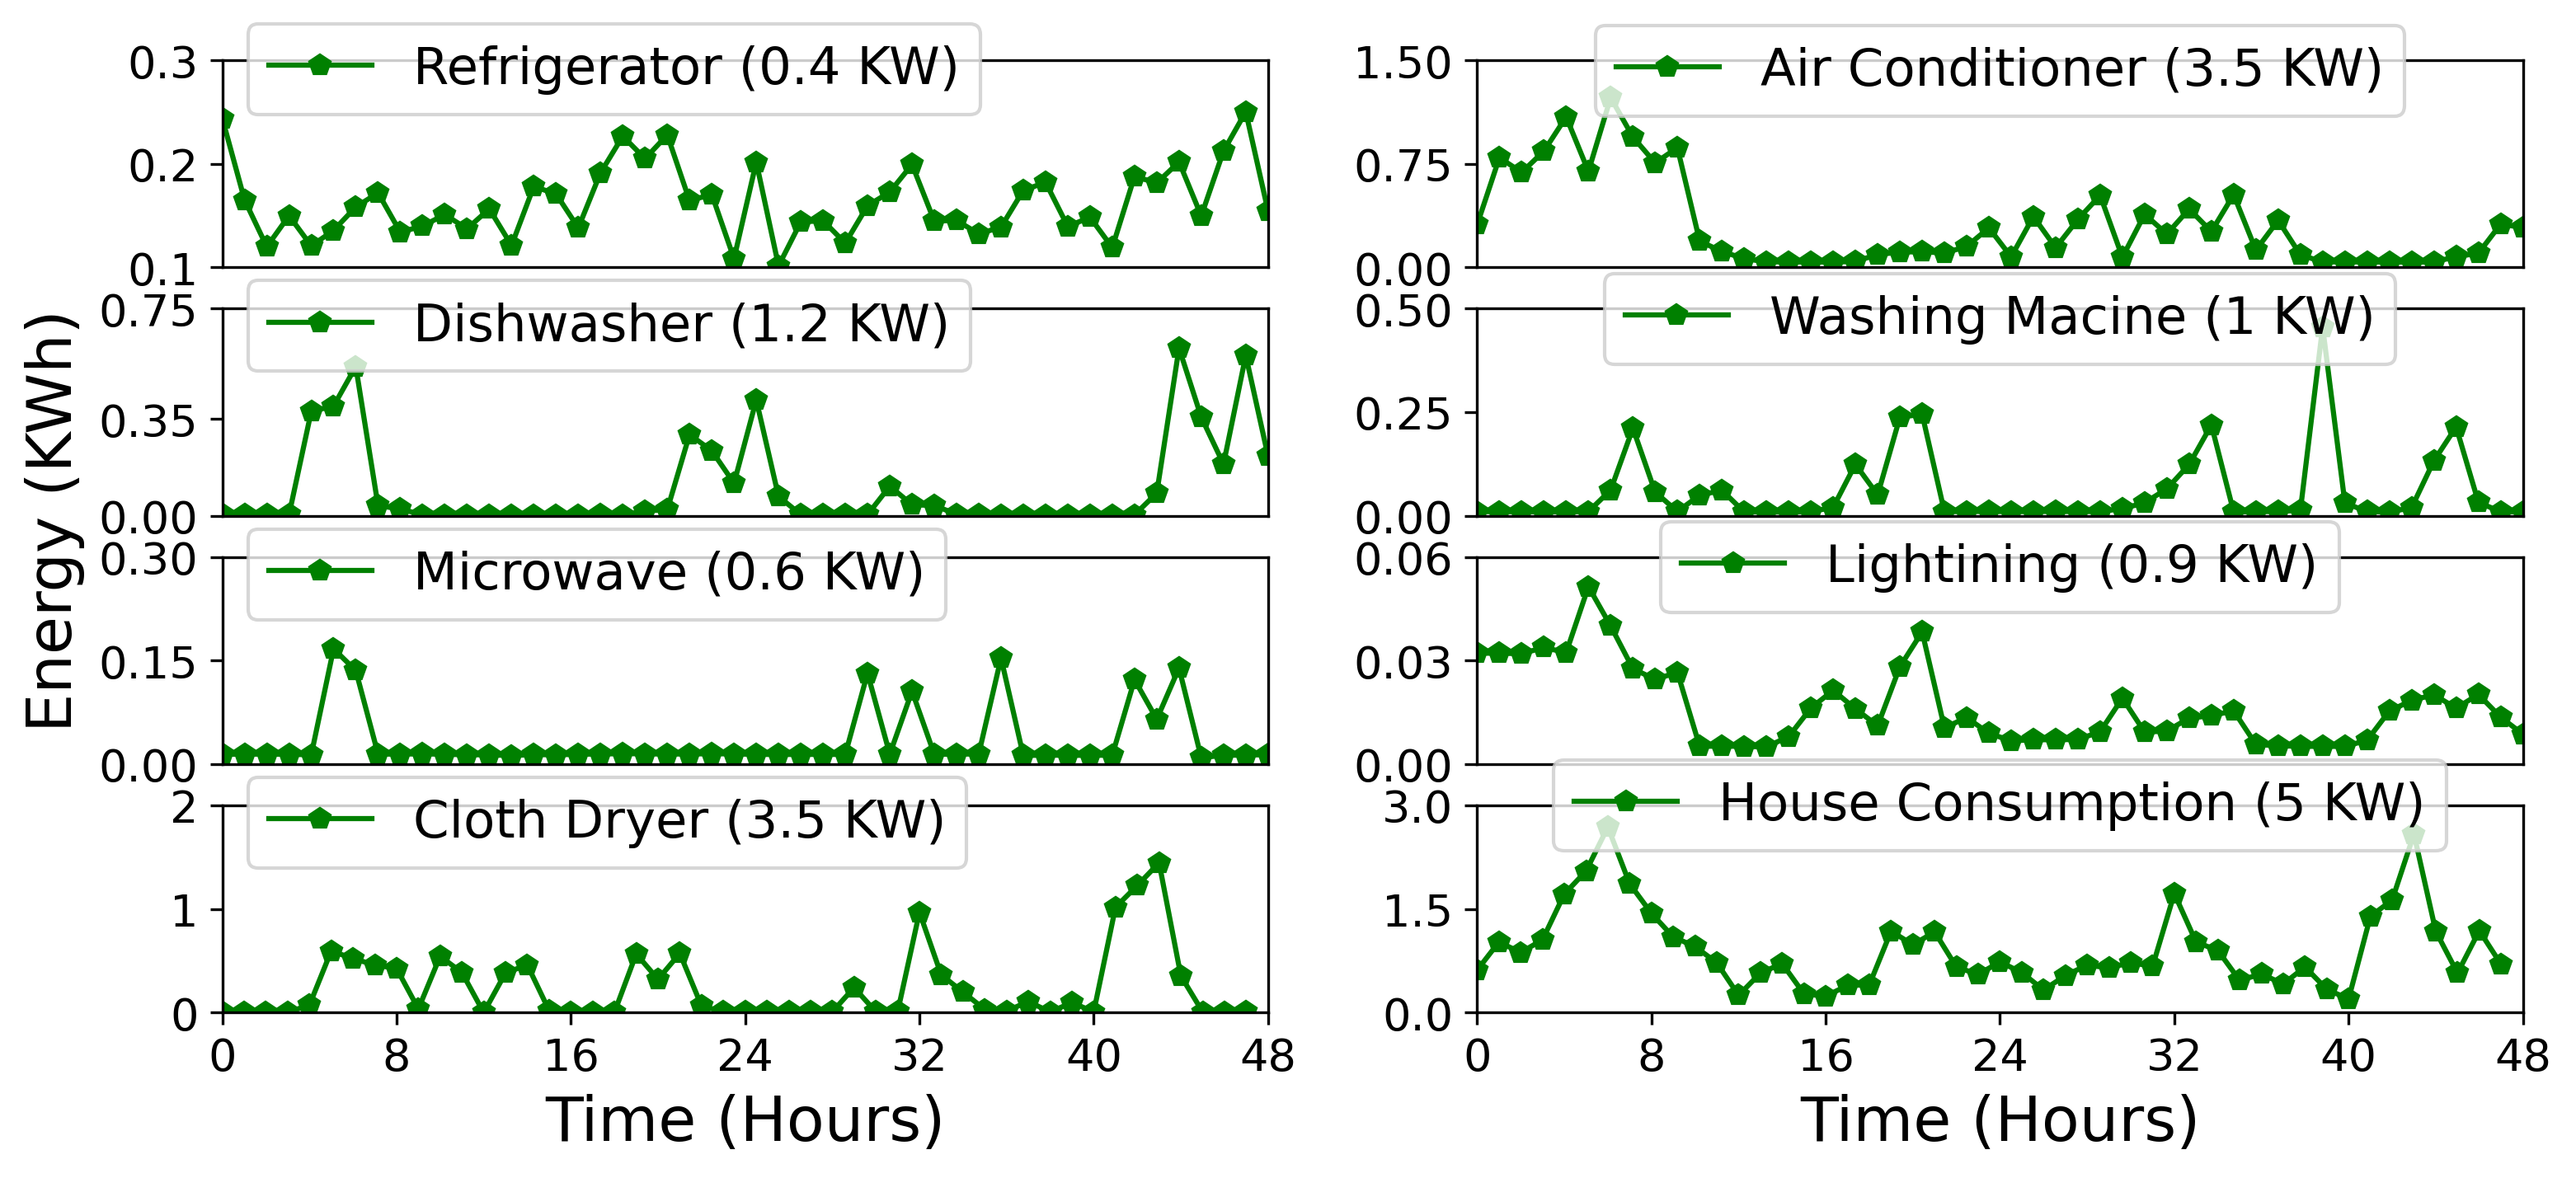

In [9]:
# -*- coding: utf-8 -*-
"""
Created on Wed Nov 10 14:12:47 2021

@author: Suleman_Sahib
"""
import numpy as np
import pandas as pd
dataset = pd.read_csv("dataset_hourly.csv")

#print(dataset.keys())
class Battery_:
    def __init__(self, size, eta = 0.95):
        self.size = size
        self.eta  = eta
        self.soc  =  0
        self.state = 0
        self.status = 0
        self.soc_plot = []
        self.time_step = []
        self.curtail_amount = []
        self.load_curtail = 0
        self.curtail_ = 0
        self.soc_plot.append(self.soc)
        self.time_step.append(0)

    def reset(self):
        self.soc  =  0
        self.state = 0
        self.status = 0
        self.load_curtail = 0
        self.curtail_ = 0
        #self.soc_plot = []
        #self.time_step = []
        self.curtail_amount = []

    def charge(self, energy, t):
         # Charging
        self.curtail_ = 0
        if (self.soc < 1) and (self.status != 1) :
            self.state = 1 # Under charging.  Flag -->

            storable = 1 -  self.soc
            required_for_storage = storable * self.size/ self.eta
            required_for_storage = round(required_for_storage,3)

            if (required_for_storage > energy):
                self.soc += (energy/ self.size) * self.eta
                self.soc = round(self.soc, 3)
            else:
                self.soc += round(required_for_storage/ self.size * self.eta , 3)
                self.soc = round(self.soc, 3)
                self.state = 0
                self.status = 1
                self.curtail_ = round (energy - required_for_storage, 3)
        else:
            self.state = 0
            #self.status = 1
        #self.curtail_amount.append(curtail_)
        #self.soc_plot.append(self.soc)
        #self.time_step.append(t)

    def drain(self, load, t):
        self.load_curtail = 0
        if self.state == 1:
            print("... Battery is under charging ...")
        elif (self.soc > 0.2) or (self.status == 1):
            self.state = 2
            dischargable = self.soc - 0.2
            dischargable = round(dischargable, 3)
            #print(f"storable energy {storable}")
            required_from_battery = round (load/self.size/ self.eta, 3)
            if (required_from_battery <= dischargable):
                self.soc -= required_from_battery
            else:
                self.load_curtail =  required_from_battery - dischargable
                self.soc -= dischargable
                self.state = 0
                self.status = 0
        else:
            print("... Battery is empty ...")

        #self.soc_plot.append(self.soc)
        #self.time_step.append(t)

class EV_:
    def __init__(self, size, eta = 0.95):
        self.size = size
        self.eta  = eta

        self.soc  =  0.2
        self.state = 0
        self.status = 0
        self.soc_plot = []
        self.time_step = []
        self.curtail_amount = []
        self.load_curtail = 0
        self.curtail_ = 0
        self.soc_plot.append(self.soc)
        self.time_step.append(0)

    def reset(self):
        self.soc  =  0.2
        self.state = 0
        self.status = 0
        self.load_curtail = 0
        self.curtail_ = 0
        #self.soc_plot = []
        #self.time_step = []
        self.curtail_amount = []

    def charge(self, energy, t):
         # Charging
        self.curtail_ = 0
        if (self.soc < 1):
            self.state = 1
            storable = 1 -  self.soc
            required_for_storage = storable * self.size/ self.eta
            required_for_storage = round(required_for_storage,3)
            if (required_for_storage > energy):
                self.soc += (energy/ self.size) * self.eta
                self.soc = round(self.soc, 3)

            else:
                self.soc += round(required_for_storage/ self.size * self.eta , 3)
                self.soc = round(self.soc, 3)
                self.state = 0
                self.status = 1
                self.curtail_ = round (energy - required_for_storage, 3)

        else:
            self.state = 0
            self.status = 1
        #self.curtail_amount.append(curtail_)
        #self.soc_plot.append(self.soc)
        #self.time_step.append(t)

    def drain(self, load, t):
        self.load_curtail = 0
        #if self.state == 1:
        #    print("... Battery is under charging ...")
        if (self.soc > 0.2):
            self.state = 2
            dischargable = self.soc - 0.2
            dischargable = round(dischargable, 3)
            #print(f"storable energy {storable}")
            required_from_battery = round (load/self.size/ self.eta, 3)
            if (required_from_battery <= dischargable):
                self.soc -= required_from_battery
                self.status = 0
            else:
                self.load_curtail =  required_from_battery - dischargable
                self.soc -= dischargable
                self.state = 0
                self.status = 0
        else:
            #print("... Battery is empty ...")
            self.state = 0
            self.status = 0
        #self.soc_plot.append(self.soc)
        #self.time_step.append(t)

const = 3
class PV_:
    def __init__(self, capacity = 20000):
        #energy = np.load('PV_GEN.npy', allow_pickle=True)
        #self.pv_dataset = energy*capacity # maximum 100 MW
        self.pv_dataset = round ((dataset["solar"]/max(dataset["solar"]))*capacity, 1)
        #self.capacity = capacity

    def gen(self, time_step):
        return self.pv_dataset[time_step]/1000

class Price_Data:
    def __init__(self, capacity =1):
        #price = np.load('Price_Data.npy', allow_pickle=True)
        #self.current_price = price# maximum 100 MW
        self.price_dataset = dataset["Price_Data"] /max(dataset["Price_Data"]) * 0.45
        self.price_dataset_1 = dataset["Price_Data_1"] /max(dataset["Price_Data_1"])

    def price(self, time_step):
        return self.price_dataset[time_step]

class EV_Schedule:
    def __init__(self, capacity =1):
        #price = np.load('Price_Data.npy', allow_pickle=True)
        #self.current_price = price# maximum 100 MW
        self.schedule = dataset["car_schedule"]

    def at_home(self, time_step):
        return self.schedule[time_step]

class appliances:
    def __init__(self):

        self.dishwasher = dataset["dishwasher1"]/max(dataset["dishwasher1"]) * 1200
        self.washingmachine = (dataset["clotheswasher1"]/max(dataset["clotheswasher1"]) ) * 1000
        self.clothesdryer = dataset["drye1"]/max(dataset["drye1"])* 3500
        self.hvac = dataset["air1"]/max(dataset["air1"]) * 3517

        self.ref    = (dataset["refrigerator1"]/max(dataset["refrigerator1"]) )* 400
        #self.heater = dataset["heater1"]/max(dataset["heater1"]) * 4500
        self.microwave = dataset["microwave1"]/max(dataset["microwave1"])*600
        #self.water_pump = dataset["pump1"]/max(dataset["pump1"])*1200
        self.lights  = dataset["lights_plugs1"]/max(dataset["lights_plugs1"]) * 90
        #self.appliance_list = ["dishwasher", "washingmachine", "clothesdryer", "hvac", "ref", "heater", "microwave", "water_pump","lights"]

        #self.ap_status = [0,0,0,0,0]

        #self.schedule = []
        #np.random.seed(342)




    def load(self,timestep):

        load = 0
        load += self.dishwasher[timestep]
        load += self.washingmachine[timestep]
        load += self.clothesdryer[timestep]
        load += self.hvac[timestep]
        load += self.ref[timestep]
        #load += self.heater[timestep]
        load += self.microwave[timestep]
        #load += self.water_pump[timestep]
        load += self.lights[timestep]

        return load/1000

#for i, data in enumerate(dataset["Price_Data_1"]):
#    if data > 0.35:
#        print(dataset["Price_Data_1"][i])# = 0.35
#dataset["Price_Data_1"] = dataset["Price_Data_1"]
#dataset.to_csv("dataset_hourly.csv")


# Dataset Plots

import matplotlib.pyplot as plt

endt = 48

pv = PV_()
ap = appliances()
price = Price_Data()
data = pv.pv_dataset[0:endt]
fontsize = 18
leg_font = 15
load = []
tick_font = 13



for i in range (endt):
       load.append(ap.load(i))

print(max(ap.ref[0:endt]))

plt.figure(figsize=((12,5)), dpi=300)
#fig.title("Appliance Consumption and Power Ratings")
plt.subplot(4, 2, 1)
plt.plot(ap.ref[0:endt]/1000, "p-", color='green')
plt.legend(["Refrigerator (0.4 KW)"], fontsize=leg_font, bbox_to_anchor=(0.0, 1.0, 1.0, 0.3),loc="upper left")
plt.ylim(0.1,0.3)
plt.xlim(0,endt-1)
#plt.ylabel("Energy (KWh)", fontsize=fontsize)
plt.xticks([])
plt.yticks([0.1,0.2,0.3], fontsize=tick_font)


plt.subplot(4, 2, 2)
plt.plot(ap.hvac[0:endt]/1000, "p-", color='green')
plt.legend(["Air Conditioner (3.5 KW)"], fontsize=leg_font, bbox_to_anchor=(0.0, 1.0, 1.0, -0.1),loc="center")
plt.ylim(0,1.5)
plt.xlim(0,endt-1)
plt.yticks([0,0.75,1.5], fontsize=tick_font)
#plt.ylabel("Energy (KWh)", fontsize=fontsize)
plt.xticks([])
plt.subplot(4, 2, 3)
plt.plot(ap.dishwasher[0:endt]/1000, "p-",color='green')
plt.legend(["Dishwasher (1.2 KW)"], fontsize=leg_font, bbox_to_anchor=(0.0, 1.0, 1.0, 0.26),loc="upper left")
plt.xticks([])
plt.ylim(0,0.75)
plt.xlim(0,endt-1)
plt.yticks([0,0.35,0.75], fontsize=tick_font)

plt.ylabel("Energy (KWh)", fontsize=fontsize, loc='top')
plt.subplot(4, 2, 4)
plt.plot(ap.washingmachine[0:endt]/1000, "p-", color='green')
plt.legend(["Washing Macine (1 KW)"], fontsize=leg_font, bbox_to_anchor=(0.0, 1.0, 1.0, -0.1),loc="center")
plt.xticks([])
plt.ylim(0,0.5)
plt.xlim(0,endt-1)
plt.yticks([0,0.25,0.5], fontsize=tick_font)
#plt.ylabel("Energy (KWh)", fontsize=fontsize, loc='top')
plt.subplot(4, 2, 5)
plt.plot(ap.microwave[0:endt]/1000, "p-", color='green')
plt.legend(["Microwave (0.6 KW)"], fontsize=leg_font, bbox_to_anchor=(0.0, 1.0, 1.0, 0.26),loc="upper left")
plt.ylim(0,0.3)
plt.xlim(0,endt-1)
plt.yticks([0,0.15,0.3], fontsize=tick_font)
#plt.ylabel("Energy (KWh)", fontsize=fontsize)
plt.xticks([])
plt.subplot(4, 2, 6)
plt.plot(ap.lights[0:endt]/1000, "p-", color='green')
plt.legend(["Lightining (0.9 KW)"], fontsize=leg_font, bbox_to_anchor=(0.0, 1.0, 1.0, -0.1),loc="center")
plt.ylim(0,0.06)
plt.xlim(0,endt-1)
plt.yticks([0,0.03,0.06], fontsize=tick_font)
#plt.ylabel("Energy (KWh)", fontsize=fontsize)
plt.xticks([])
plt.subplot(4, 2, 7)
plt.plot(ap.clothesdryer[0:endt]/1000, "p-",color='green')
plt.legend(["Cloth Dryer (3.5 KW)"], fontsize=leg_font, bbox_to_anchor=(0.0, 1.0, 1.0, 0.26),loc="upper left")
plt.ylim(0,2)
plt.xlim(0,endt-1)
plt.yticks([0,1,2], fontsize=tick_font)

plt.xticks(np.arange(0,endt+1, 8), fontsize=tick_font)
#plt.ylabel("Energy (KWh)", fontsize=fontsize)
plt.xlabel("Time (Hours)", fontsize=fontsize)

plt.subplot(4, 2, 8)
plt.plot(load[0:endt], "p-", color='green')
plt.legend(["House Consumption (5 KW)"], fontsize=leg_font, bbox_to_anchor=(0.0, 1.0, 1.0, 0.0),loc="center")
plt.ylim(0,3)
plt.xlim(0,endt-1)
plt.yticks([0,1.5,3], fontsize=tick_font)
plt.xticks(np.arange(0,endt+1, 8), fontsize=tick_font)
#plt.ylabel("Energy (KWh)", fontsize=fontsize)
plt.xlabel("Time (Hours)", fontsize=fontsize)




In [11]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 20 15:32:07 2021

@author: Suleman_Sahib
"""

#import Battery_, EV_, PV_, appliances, Price_Data, EV_Schedule


ev_ch_cap = 7.400
class home_env:

     def __init__(self, Total_Battries = 3, Total_EV = 1):

         self.pv = PV_()

         self.gen = 0
         self.load = 0
         self.grid_util = 0
         self.gen_load = 0
         self.energy_exported = []
         self.grid_cost = []
         self.imported_from_grid = []
         self.saved_in_batteries = []
         self.used_from_batteries = []
         self.saved_in_ev = []
         self.ev_profit = []
         self.generation = []
         self.consumption = []
         self.profit = []
         self.ev_profit = []
         self.EV = EV_Schedule()

         self.grid_price = Price_Data()



         self.bat_no = 0
         self.drain_no = 0
         self.charge_count = 0
         self.total_bat = Total_Battries


         self.battries = [Battery_(size=15) for _  in range(Total_Battries)]

         self.ev = EV_(size=20.000)
         self.appliances = appliances()


     def reset(self):
         self.ev.reset()
         for b in self.battries:
             b.reset()

         self.bat_no = 0
         self.drain_no = 0
         self.charge_count = 0
         self.grid = 0
         self.gen = 0
         self.load = 0
         self.gen_load = 0

     def data_reset(self):
         self.energy_exported = []
         self.grid_cost = []
         self.imported_from_grid = []
         self.saved_in_batteries = []
         self.used_from_batteries = []
         self.saved_in_ev = []
         self.ev_profit = []
         self.profit = []
         self.generation = []
         self.consumption = []
         self.ev_profit = []

     # This method is used for managing energy through reinforcemenet learning
     #
     def get_energy(self, t):
         self.gen = self.pv.gen(t)
         self.load = self.get_load(t)
         self.generation.append((self.gen, t))
         self.consumption.append((self.load, t))

         if (self.gen > self.load):
             energy = self.gen - self.load
             self.gen_load = 1
             # this shows that energy is available after fulfilling the load
         else:
             energy = self.load - self.gen
             self.gen_load = 0
             # this shows that energy is not available after fulfilling the load
         #self.generation.append((self.gen,t))
         #self.consumption.append((self.load,t))
         return energy, self.gen_load


     # This function automatically manages all the energy routing
     # Using rule based method
     #

         #self.profit = self.ev_profit - self.cost

#This method returns the load consumed by all the appliances at home.
     def get_load(self, timestep):
         return self.appliances.load(timestep)

     def save_in_battery(self, energy, t):

         if (self.battries[0].status != 1) or (self.battries[1].status != 1) or (self.battries[2].status != 1) :
            #print("Battery being charged------------------", self.bat_no)
            #self.saved_in_batteries.append((energy, t))
            self.battries[self.bat_no].charge(energy, t)
            self.saved_in_batteries.append((energy, t))

            if self.battries[self.bat_no].status == 1:

                ex = self.battries[self.bat_no].curtail_
                for no, b in enumerate(self.battries):
                    if b.status == 0:
                        self.bat_no = no
                        break
                self.battries[self.bat_no].charge(ex, t)

                ex = 0
         else:
            #print ("All battries are Full", self.bat_no)

            self.bat_no = 0
            for no, b in enumerate(self.battries):
                    if b.status == 0:
                        self.bat_no = no
                        break


     def drain_from_battery(self, energy, t):

        if (self.battries[0].status == 1) or (self.battries[1].status == 1) or (self.battries[2].status == 1) :
            #self.used_from_batteries.append((energy,t))
            if (self.battries[self.drain_no].status == 0):
                #self.charge_count -= 1

                for no, b in enumerate(self.battries):
                    if b.status == 1:
                        self.drain_no = no
                        break
            #print("Battery being Drained is ....Drain#------------. ",self.drain_no , self.battries[self.drain_no].status )

            if (self.battries[self.drain_no].status != 0):
                self.battries[self.drain_no].drain(energy, t)
                self.used_from_batteries.append((energy, t))
                profit = energy * self.grid_price.price(t)
                self.profit.append((profit, t))


           # print("here inside", self.drain_no)
        else: # All batteries empty condition
            #print(f"{energy} KW Energy will be taken from grid")

            for no, b in enumerate(self.battries):
                    if b.status == 1:
                        self.drain_no = no
                        break


     def manage_energy(self, time_step):

         t = time_step
         self.gen = self.pv.gen(t)
         self.load = self.get_load(t)
         self.generation.append((self.gen,t))
         self.consumption.append((self.load,t))
         self.get_energy(t)
         #print(gen, load)
         if self.gen > self.load:
             energy = self.gen - self.load
             if (self.battries[0].soc < 1) or (self.battries[1].soc < 1) or (self.battries[2].soc < 1) :
                 self.save_in_battery(energy, t)

             elif (energy >= ev_ch_cap) and (self.ev.soc < 1) and (self.EV.at_home(t) == 0):
                     self.gen_load = 1
                     self.charge_ev(0, t)


             else:
                 self.export_energy(energy, t)


         else:
             energy = self.load - self.gen
             if (self.battries[0].status == 1) or (self.battries[1].status == 1) or (self.battries[2].status == 1) :
                 self.drain_from_battery(energy, t)
                 self.used_from_batteries.append((energy,t))
                 if (self.ev.status < 0.8) and (self.EV.at_home(t) == 0):
                     self.charge_ev(energy, t)
                     #self.saved_in_ev.append((5,t))
                     self.drain_from_battery(ev_ch_cap, t)


             else:
                 self.get_from_grid(energy, t)
                 #self.imported_from_grid.append((energy,t))
                 if (self.ev.status < 0.8) and (self.EV.at_home(t) == 0):
                     self.charge_ev(energy, t)
                     #self.saved_in_ev.append((5,t))
                     self.get_from_grid(ev_ch_cap, t)
                     #self.imported_from_grid.append((5,t))



         if (self.EV.at_home(t) == 1):
            self.ev.drain(2.265,t)
     def get_from_grid(self, load, t):
         cost = load * self.grid_price.price(t)
         self.grid_util = load
         self.grid_cost.append((cost,t))
         self.imported_from_grid.append((load,t))


     def export_energy(self, energy, t):
         profit_now = energy * self.grid_price.price(t)
         self.energy_exported.append((energy, t))
         self.profit.append((profit_now , t))


     def charge_ev(self,energy, t):
             # EV is charged at constant rate that is 3 KW energy per hour.
             ### if energy passed to this function is extra solar energy then only
             # 3Kw is passed to EV battery and other is exported to the grid.
             ### Othsewise: 3Kw is drained form home battery and saved in EV battery
             profit = 0
             if (self.gen_load == 1):
                 if (energy ==  ev_ch_cap):
                    self.ev.charge(ev_ch_cap, t)
                    self.saved_in_ev.append((ev_ch_cap,t))
                    profit = ev_ch_cap * self.grid_price.price(t)
                    self.ev_profit.append((profit, t))
                    self.profit.append((profit, t))

                 elif (energy > ev_ch_cap):
                    extra = energy - ev_ch_cap
                    self.ev.charge(ev_ch_cap, t)
                    self.saved_in_ev.append((ev_ch_cap,t))
                    profit = ev_ch_cap * self.grid_price.price(t)
                    self.ev_profit.append((profit, t))
                    self.profit.append((profit, t))
                    self.export_energy(extra, t)
                 elif (energy < ev_ch_cap):
                     remain = ev_ch_cap - energy

                     self.ev.charge(ev_ch_cap, t)
                     self.saved_in_ev.append((ev_ch_cap,t))
                     cost = remain * self.grid_price.price(t)
                     personal = energy *  self.grid_price.price(t)
                     profit = personal - cost
                     self.ev_profit.append((profit, t))
                     self.profit.append((profit, t))
                     self.get_from_grid(remain, t)

             else:
                 if (self.battries[0].status == 1) or (self.battries[1].status == 1) or (self.battries[2].status == 1):
                     self.ev.charge(ev_ch_cap, t)
                     self.saved_in_ev.append((ev_ch_cap,t))
                     self.drain_from_battery(ev_ch_cap + energy, t)
                     profit = ev_ch_cap * self.grid_price.price(t)
                     self.ev_profit.append((profit, t))
                     #self.profit.append((profit, t))
                 else:
                     self.get_from_grid(ev_ch_cap + energy, t)
                     self.ev.charge(ev_ch_cap, t)
                     self.saved_in_ev.append((ev_ch_cap,t))
                     profit = -ev_ch_cap * self.grid_price.price(t)
                     self.ev_profit.append((profit, t))
                     self.profit.append((profit, t))






     def manage_energy(self, time_step):

         t = time_step
         self.gen = self.pv.gen(t)
         self.load = self.get_load(t)
         self.generation.append((self.gen,t))
         self.consumption.append((self.load,t))
         #print(gen, load)
         if self.gen > self.load:
             energy = self.gen - self.load
             if (self.battries[0].soc < 1) or (self.battries[1].soc < 1) or (self.battries[2].soc < 1) :
                 self.save_in_battery(energy, t)
                 self.saved_in_batteries.append((energy,t))

             elif (self.ev.status != 1) and (self.EV.at_home(t) == 0):
                     self.charge_ev(energy, t)
                     #self.saved_in_ev.append((energy,t))
             else:
                 self.export_energy(energy, t)


         else:
             energy = self.load - self.gen
             if (self.battries[0].status == 1) or (self.battries[1].status == 1) or (self.battries[2].status == 1) :
                 self.drain_from_battery(energy, t)
                 self.used_from_batteries.append((energy,t))
                 if (self.ev.status != 1) and (self.EV.at_home(t) == 0):
                     self.charge_ev(energy, t)
                     #self.saved_in_ev.append((energy,t))

             else:
                 self.get_from_grid(energy, t)
                 #self.imported_from_grid.append((energy,t))
                 if (self.ev.status < 0.5) and (self.EV.at_home(t) == 0):
                     self.charge_ev(5, t)
                     #self.saved_in_ev.append((5,t))
                     self.get_from_grid(5, t)
                     #self.imported_from_grid.append((5,t))



         if (self.EV.at_home(t) == 1):
            self.ev.drain(0.6,t)

<ipython-input-14-8dab6fd77148>:134: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "bp-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(status_1, "bp-", linestyle=':', linewidth=2, markersize=10)
<ipython-input-14-8dab6fd77148>:135: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r*-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(status_2, 'r*-', linestyle=':', linewidth=2, markersize=10)
<ipython-input-14-8dab6fd77148>:136: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(status_3, "go-", linestyle=':', linewidth=2, markersize=10)
<ipython-input-14-8dab6fd77148>:137: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "^-" (-> linestyle='-'). The

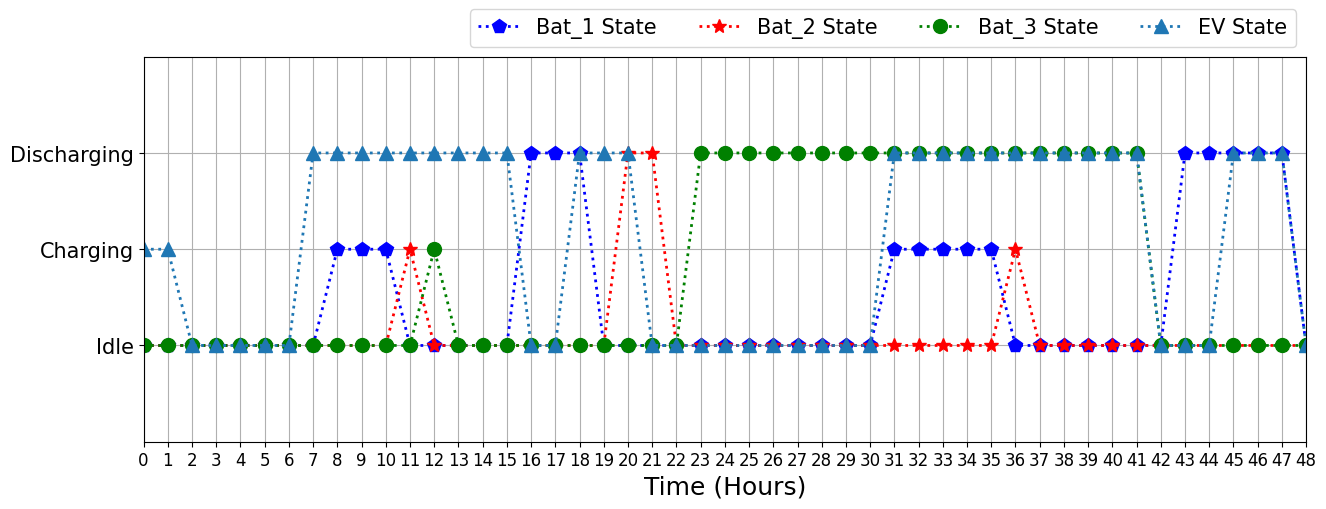

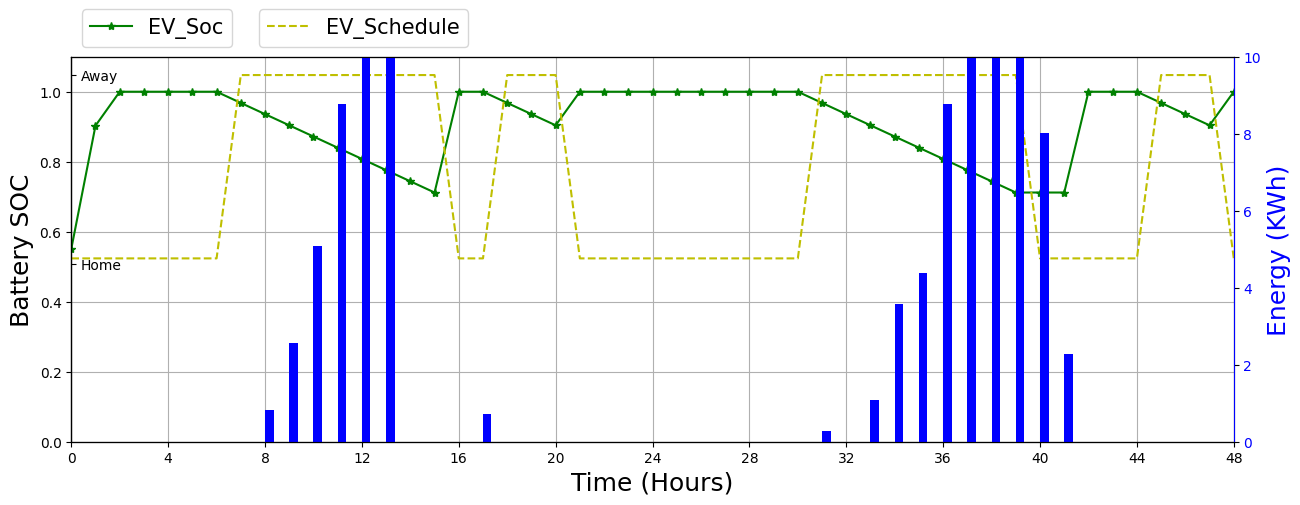

Dependencies: ['numpy', 'matplotlib', 'time', 'Modules', 'HEMS_Environment', 'MDP_Development1']


In [14]:
# -*- coding: utf-8 -*-
"""
Created on Sat Jan 22 01:02:47 2022

@author: Suleman_Sahib
"""

# Import necessary modules
#from Modules import appliances, EV_, EV_Schedule
import time
import numpy as np
#from HEMS_Environment import home_env
import matplotlib.pyplot as plt
#from MDP_Development1 import HEMS_MDP

# Initialize variables and environment
start = time.time()
home = home_env()
start_t = 0  # Start time
end_t = 48   # End time

# Set plotting parameters
fontsize = 18  # Font size for plots
width = 20     # Graph width
height = 5     # Graph height
dpi = 100      # Image resolution, 300 or above
tick_size = 15

# Initialize lists to store data for visualization
bat1, bat2, bat3 = [], [], []
all_t, pv, load, ev_soc = [], [], [], []
status_1, status_2, status_3, status_ev = [], [], [], []
sched = []
per_day_profit = []

# Run the simulation for 1000 steps (time units)
for i in range(1000):
    home.manage_energy(i)  # Manage the energy for the current time step

    # Store battery states and other data
    bat1.append(home.battries[0].soc)
    bat2.append(home.battries[1].soc)
    bat3.append(home.battries[2].soc)
    status_1.append(home.battries[0].state)
    status_2.append(home.battries[1].state)
    status_3.append(home.battries[2].state)
    status_ev.append(home.ev.state)
    all_t.append(i)
    ev_soc.append(home.ev.soc)
    pv.append(home.gen)
    load.append(home.load)
    sched.append(home.EV.at_home(i))  # EV schedule

    # Calculate daily profit every 24 hours (at hour 23)
    if i % 23 == 0:
        economy_time = []
        economy_profit = []
        for e, t in home.profit:
            economy_time.append(t)
            economy_profit.append(e)
        home.profit = []
        per_day_profit.append(sum(economy_profit))

# Save daily profit data
#np.save("paper_results/per_day_profit_cond.npy", per_day_profit, allow_pickle=True)

# Uncommented data saving for different home system data
# np.save("paper_results/Conditional_Bat_1.npy", bat1, allow_pickle=True)
# np.save("paper_results/Conditional_Bat_2.npy", bat2, allow_pickle=True)
# np.save("paper_results/Conditional_Bat_3.npy", bat3, allow_pickle=True)
# np.save("paper_results/Conditional_status_1.npy", status_1, allow_pickle=True)
# np.save("paper_results/Conditional_status_2.npy", status_2, allow_pickle=True)
# np.save("paper_results/Conditional_status_3.npy", status_3, allow_pickle=True)
# np.save("paper_results/Conditional_status_ev.npy", status_ev, allow_pickle=True)
# np.save("paper_results/Conditional_ev_soc.npy", ev_soc, allow_pickle=True)
# np.save("paper_results/Conditional_PV.npy", pv, allow_pickle=True)
# np.save("paper_results/Conditional_Load.npy", load, allow_pickle=True)
# np.save("paper_results/Conditional_EV_Schedule.npy", sched, allow_pickle=True)

# Save energy data for import/export and grid costs
time_steps1, grid_cost = [], []
for e, t in home.profit:
    time_steps1.append(t)
    grid_cost.append(e)
# np.save("paper_results/Conditional_Export_Profit.npy", grid_cost, allow_pickle=True)
# np.save("paper_results/Conditional_export_profit_time.npy", time_steps1, allow_pickle=True)

# Save grid import costs
time_steps1, grid_cost = [], []
for e, t in home.grid_cost:
    time_steps1.append(t)
    grid_cost.append(e)
# np.save("paper_results/Conditional_import_cost.npy", grid_cost, allow_pickle=True)
# np.save("paper_results/Conditional_import_cost_time.npy", time_steps1, allow_pickle=True)

# Save energy data for imported and saved energy
tstep2, energy2 = [], []
for e, t in home.imported_from_grid:
    tstep2.append(t)
    energy2.append(e)
# np.save("paper_results/Conditional_Imported_from_Grid.npy", energy2, allow_pickle=True)
# np.save("paper_results/Conditional_import_time.npy", tstep2, allow_pickle=True)

tstep1, energy1 = [], []
for e, t in home.saved_in_batteries:
    tstep1.append(t)
    energy1.append(e)
# np.save("paper_results/Conditional_Save_In_Bat.npy", energy1, allow_pickle=True)
# np.save("paper_results/Conditional_Sabe_Bat_time.npy", tstep1, allow_pickle=True)

tstep, energy = [], []
for e, t in home.used_from_batteries:
    tstep.append(t)
    energy.append(e)
# np.save("paper_results/Conditional_Used_from_Bat.npy", energy, allow_pickle=True)
# np.save("paper_results/Conditional_Time_Bat_use.npy", tstep, allow_pickle=True)

tstep3, energy3 = [], []
for e, t in home.saved_in_ev:
    tstep3.append(t)
    energy3.append(e)
# np.save("paper_results/Conditional_Save_in_Ev.npy", energy3, allow_pickle=True)
# np.save("paper_results/Conditional_Ev_save_Time_step.npy", tstep3, allow_pickle=True)

tstep4, energy4 = [], []
for e, t in home.energy_exported:
    tstep4.append(t)
    energy4.append(e)
# np.save("paper_results/Conditional_Energy_Exported.npy", energy4, allow_pickle=True)
# np.save("paper_results/Conditional_Export_Time.npy", tstep4, allow_pickle=True)

# Plot battery status (Idle, Charging, Discharging)
plt.figure(figsize=(15, 5), dpi=dpi)
plt.plot(status_1, "bp-", linestyle=':', linewidth=2, markersize=10)
plt.plot(status_2, 'r*-', linestyle=':', linewidth=2, markersize=10)
plt.plot(status_3, "go-", linestyle=':', linewidth=2, markersize=10)
plt.plot(status_ev, "^-", linestyle=':', linewidth=2, markersize=10)
plt.xlabel("Time (Hours)", fontsize=fontsize)
plt.legend(["Bat_1 State", 'Bat_2 State', 'Bat_3 State', "EV State"], bbox_to_anchor=(1.0, 1.0, 0.0, 0.15), loc="upper right", ncol=4, fontsize=15)
plt.xticks(np.arange(start_t, end_t+1, 1), fontsize=12)
plt.yticks([0, 1, 2], labels=["Idle", 'Charging', "Discharging"], fontsize=tick_size)
plt.xlim(start_t, end_t)
plt.ylim(-1, 3)
plt.grid()
plt.show()

# Plot EV State of Charge (SOC) and schedule with energy saved in EV
plt.figure(figsize=(15, 5), dpi=dpi)
ax1 = plt.subplot(1, 1, 1)
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax1.plot(ev_soc, "g*-")
ax2.plot(home.EV.schedule[start_t::], "y--")
ax3.bar(tstep1[start_t::], energy1[start_t::], width=0.35, align="edge", color='blue')
ax3.set_ylabel("Energy (KWh)", fontsize=fontsize)
ax1.set_ylabel("Battery SOC", fontsize=fontsize)
ax1.set_xlabel("Time (Hours)", fontsize=fontsize)
ax1.legend(["EV_Soc"], bbox_to_anchor=(0.0, 1.0, 1.0, 0.15), loc="upper left", ncol=4, fontsize=15)
ax2.legend(["EV_Schedule"], bbox_to_anchor=(0.35, 1.0, 0.0, 0.15), loc="upper right", ncol=4, fontsize=15)
ax1.set_xticks(np.arange(start_t, end_t+1, 4))
ax2.set_yticks([-0.03, 1])
ax2.set_yticklabels(["Home", "Away"], fontsize=fontsize)
plt.xlim(start_t, end_t)
ax1.set_ylim(0, 1.1)
ax2.set_ylim(-1, 1.1)
ax3.set_ylim(0, 10)
ax2.spines["right"].set_position(("axes", 0.0))
ax3.tick_params(axis='y', labelcolor='blue')
ax3.spines["right"].set_position(("axes", 1.0))
ax3.spines["right"].set_edgecolor("blue")
ax3.yaxis.label.set_color("blue")
ax1.grid()
plt.show()

# Define dependencies
dependencies = [
    'numpy',
    'matplotlib',
    'time',
    'Modules',  # Custom module: appliances, EV_, EV_Schedule
    'HEMS_Environment',  # Custom module: home_env
    'MDP_Development1'  # Custom module: HEMS_MDP
]

print("Dependencies:", dependencies)

In [19]:
# -*- coding: utf-8 -*-
"""
Created on Wed Nov 10 14:12:47 2021

@author: Suleman_Sahib
"""
import gym
from gym import Env,spaces
import matplotlib.pyplot as plt
import numpy as np

# from Modules import PV_, EV_Schedule
# from HEMS_Environment import home_env

#observation_space = spaces.Box(low=np.array([0,0,0,0,0]), high=np.array([1.0,1.0,1.0, 100,1.0]))
#print(observation_space.shape)


"""
Action Space: Discrete (Charge Battery, charge ev, discharge battery, import from grid, turn_off_load)
Observation Space: Continuous (All_bat_soc, pv, load, ev_state)
"""
class HEMS_MDP(Env):
    def __init__(self):

        self.action_space = spaces.Discrete(5)
        self.observation_shape = (6,)
        self.observation_space = spaces.Box(low=np.array([0,0,0,0,0,0]), high=np.array([1,1,1,1,1,1]))
        PV = PV_()

        self.home = home_env()
        self.time_step = 0
        self.EV = EV_Schedule()
        self.steps_in_environment = 0
        self.episode_reward = 0

        self.energy_exported = []
        self.grid_cost = []
        self.imported_from_grid = []
        self.saved_in_batteries = []
        self.used_from_batteries = []
        self.saved_in_ev = []
        self.ev_profit = []
        self.profit = []
        self.generation = []
        self.consumption = []


    def step(self, action):
        reward = 0
        done = False
        # gen_or_load: It is true if generation is more than load else False
        # energy: It is the amount of extra load or extra generation
        # energy = generation - load     [ if generation > load ] (It is also considerd as extra energy)
        # energy = load - generation     [ if load > generation ]
        energy, gen_or_load = self.home.get_energy(self.time_step)


        if action == 0:  # Charge the battery
            # It saves the energy to the battery without checking any condition.
            # Because it is the responsibility of the RL agent to correctly monitor the state
            # and chose correct action




            # A reward +ve reward is awarded if the batteries are charges with the energy that is extra
            # after fulfilling the load. Batteries are only charged from the soalr energy available to save
            # the cost.
            # a negative reward is awarded by the environment for charging the batteries at wrong state.
            #self.home.save_in_battery(energy, self.time_step)
            #self.saved_in_batteries.append((energy,self.time_step))
            if (gen_or_load == 1) and ((self.home.battries[0].status != 1) or (self.home.battries[1].status != 1) or (self.home.battries[2].status != 1)):
                self.home.save_in_battery(energy, self.time_step)
                reward += 1.0

            else:
                reward -= 1.0

        # Charge the EV
        if action == 1:
            # Ev is charged either from the extra energy or from the batteries.
            # Positive Reward conditions are
            #   if EV is not full
            #   if any battery among all batteries is fully charged
            #   if EV is at home.
            # if any one of the conditions is not fulfilled negative reward is given
            #self.home.charge_ev(energy, self.time_step)
            #self.saved_in_ev.append((energy,self.time_step))

            if (self.home.ev.status != 1) and (self.EV.at_home(self.time_step) == 0):

                self.home.charge_ev(energy, self.time_step)
                reward += 2.5
                #done = True
            else:
                reward -= 1.0
        #Discharge the battery
        if action == 2:
            # For positive reward
            # Batteries must be discharged when the load is greater than generation.
            #  and an one of the battery is fully charged.
            #self.home.drain_from_battery(energy,self.time_step)
            #self.used_from_batteries.append((energy,self.time_step))
            if (gen_or_load == 0) and ((self.home.battries[0].status == 1) or (self.home.battries[1].status == 1) or (self.home.battries[2].status == 1)):

                self.home.drain_from_battery(energy,self.time_step)
                reward += 1.0
                #done = True
            else:
                reward -= 1.0
        #Import from Grid
        if action == 3:
            # To get positive reward
            # Energy must be imported from grid if the load is greater than generation
            # and all the batteries are fully drained.
            #self.home.get_from_grid(energy,self.time_step)
            #self.imported_from_grid.append((energy,self.time_step))
            if (gen_or_load == 0) and (self.home.battries[0].status == 0) and (self.home.battries[1].status == 0) and (self.home.battries[2].status == 0):

                self.home.get_from_grid(energy,self.time_step)
                reward += 1.0
                #done = True
            else:
                reward -= 1.0

        #Export Energy to the grid
        if action == 4:
            # A positive reward for export will be given if generation is greater than load
            # all the batteries are fully charged and EV if fully charged or EV is not at home.
            #
            #self.home.export_energy(energy, self.time_step)
            #self.energy_exported.append((energy,self.time_step))
            if (gen_or_load == 1) and (self.home.battries[0].status == 1 and self.home.battries[1].status == 1  and self.home.battries[2].status == 1) and ((self.EV.at_home(self.time_step) == 1) or ((self.EV.at_home(self.time_step) == 0) and (self.home.ev.status == 1))):

                self.home.export_energy(energy, self.time_step)

                reward += 1.0
                #done = True
            else:
                reward -= 1.0
            #else:
            #    act_reward = -1.0
                #done = True
            # done = True means that the ultimate goal of the agnet is to fully charge all the batteries and EV battery and start exporting the extra energy to the grid. 4.0

        # It is the utilization of EV battery when EV is not at home.
        # EV battery is drained at a constant rate


        if (self.EV.at_home(self.time_step) == 1):
            self.home.ev.drain(2.265,self.time_step)



        if reward == 1:
            self.episode_reward += 1
        if (self.steps_in_environment >= 36):
            done = True
            reward = self.episode_reward #1000
            self.episode_reward = 0
            self.steps_in_environment  = 0.0
        else:
            self.steps_in_environment += 1


        #self.time_step += 1
        next_state = self.get_next_state()
        # The dataset contains 6 months of data. So there are 4416 hours in 6 months.
        # Thus after every 4415 hours values from dataset will be loaded again from first hour.
        if self.time_step == 4414:
            self.time_step = 0
        else:
            self.time_step += 1





        return next_state, reward, done, {}





    def get_next_state(self):

        energy, gen_or_load = self.home.get_energy(self.time_step + 1)
        b1 = self.home.battries[0].status
        b2 =  self.home.battries[1].status
        b3 = self.home.battries[2].status
        state_ev = self.home.ev.status
        home_status = self.EV.at_home(self.time_step + 1)
        return np.asarray([gen_or_load, b1,b2,b3, state_ev, home_status])




    def reset(self):
        self.home.reset()
        #self.home.data_reset()
        self.steps_in_environment = 0
        self.episode_reward = 0.0
        energy, gen_or_load = self.home.get_energy(self.time_step)
        b1 = self.home.battries[0].status
        b2 =  self.home.battries[1].status
        b3 = self.home.battries[2].status
        state_ev = self.home.ev.status
        home_status = self.EV.at_home(self.time_step)
        return np.asarray([gen_or_load, b1,b2,b3, state_ev, home_status])

    def close(self):
        pass

"""
env = HEMS_MDP()


for t in range(5000):
    a = env.action_space.sample()
    n_state, reward, done, _ = env.step(a)

    if (done == True) and reward > 0:
        print(reward)

"""

'\nenv = HEMS_MDP()\n\n\nfor t in range(5000):\n    a = env.action_space.sample()\n    n_state, reward, done, _ = env.step(a)\n    \n    if (done == True) and reward > 0:\n        print(reward)\n        \n'

In [21]:
# -*- coding: utf-8 -*-
"""
Created on Wed Nov 10 14:12:47 2021

@author: Suleman_Sahib
"""

# Import necessary libraries
import tensorflow as tf
import gym
from collections import deque
import numpy as np
import random
import math
import time
import glob
import io
import base64
import matplotlib.pyplot as plt

#from MDP_Test_DQN import HEMS_MDP

start = time.time()

# Initialize environment and get the number of state features and actions
env = HEMS_MDP()
num_features = env.observation_shape[0]
num_actions = env.action_space.n
print('Number of state features: {}'.format(num_features))
print('Number of possible actions: {}'.format(num_actions))

class DQN(tf.keras.Model):
  """Define the neural network (Q-network) for DQN."""
  def __init__(self):
    super(DQN, self).__init__()
    # Define layers of the network (fully connected)
    self.dense1 = tf.keras.layers.Dense(16, activation="relu")
    self.dense2 = tf.keras.layers.Dense(16, activation="relu")
    self.dense3 = tf.keras.layers.Dense(16, activation="relu")
    self.dense4 = tf.keras.layers.Dense(16, activation="relu")
    self.dense5 = tf.keras.layers.Dense(num_actions, dtype=tf.float32)  # Output layer for Q-values

  def call(self, x):
    """Forward pass of the neural network."""
    x = self.dense1(x)
    x = self.dense2(x)
    x = self.dense3(x)
    x = self.dense4(x)
    return self.dense5(x)  # Return the Q-values for each action

# Initialize two DQN models (main network and target network)
main_nn = DQN()
target_nn = DQN()

# Optimizer and loss function setup
optimizer = tf.keras.optimizers.Adam(1e-5)  # Adam optimizer with learning rate
mse = tf.keras.losses.MeanSquaredError()  # Mean Squared Error loss function

# Define replay buffer to store experience (state, action, reward, next_state, done)
class ReplayBuffer(object):
  """Experience replay buffer that samples uniformly."""
  def __init__(self, size):
    self.buffer = deque(maxlen=size)

  def add(self, state, action, reward, next_state, done):
    """Add experience tuple to the buffer."""
    self.buffer.append((state, action, reward, next_state, done))

  def __len__(self):
    """Return the size of the buffer."""
    return len(self.buffer)

  def sample(self, num_samples):
    """Sample a batch of experiences from the buffer."""
    states, actions, rewards, next_states, dones = [], [], [], [], []
    idx = np.random.choice(len(self.buffer), num_samples)  # Random indices
    for i in idx:
      elem = self.buffer[i]
      state, action, reward, next_state, done = elem
      states.append(np.array(state, copy=False))
      actions.append(np.array(action))
      rewards.append(reward)
      next_states.append(np.array(next_state, copy=False))
      dones.append(done)
    # Return arrays of states, actions, rewards, etc.
    states = np.array(states, dtype=np.float32)
    actions = np.array(actions)
    rewards = np.array(rewards, dtype=np.float32)
    next_states = np.array(next_states, dtype=np.float32)
    dones = np.array(dones, dtype=np.float32)
    return states, actions, rewards, next_states, dones

# Epsilon-greedy action selection
def select_epsilon_greedy_action(state, epsilon):
  """Take random action with probability epsilon, else take best action."""
  result = tf.random.uniform((1,))
  if result < epsilon:
    return env.action_space.sample()  # Random action (left or right)
  else:
    return tf.argmax(main_nn(state)[0]).numpy()  # Greedy action for state

@tf.function
def train_step(states, actions, rewards, next_states, dones):
  """Perform a training iteration on a batch of data sampled from the experience
  replay buffer."""
  # Calculate targets using Bellman equation
  next_qs = target_nn(next_states)  # Get Q-values from target network
  max_next_qs = tf.reduce_max(next_qs, axis=-1)  # Get maximum Q-value for next state
  target = rewards + (1. - dones) * discount * max_next_qs  # Bellman target

  with tf.GradientTape() as tape:
    qs = main_nn(states)  # Q-values from the main network
    action_masks = tf.one_hot(actions, num_actions)  # One-hot encode actions
    masked_qs = tf.reduce_sum(action_masks * qs, axis=-1)  # Masked Q-values
    loss = mse(target, masked_qs)  # Compute loss

  grads = tape.gradient(loss, main_nn.trainable_variables)  # Compute gradients
  optimizer.apply_gradients(zip(grads, main_nn.trainable_variables))  # Update weights
  return loss  # Return the loss value

# Hyperparameters and training setup
espi = []
num_episodes = 5000
epsilon = 1.0
epsilon_decay_1 = 0.0003984  # Epsilon decay rate
batch_size = 64
discount = 0.87  # Discount factor
buffer = ReplayBuffer(100000)  # Replay buffer size
cur_frame = 0
min_reward = 0  # Minimum reward to save the model

# Training loop
last_100_ep_rewards = []  # Store rewards from the last 100 episodes
loss_value = []
loss_value_1 = []
rew = []
ep_reward = 0

# Loop through episodes
for episode in range(num_episodes+1):
  state = env.reset()  # Reset environment at the start of each episode
  ep_reward, done = 0, False
  loss = 0
  while not done:
    state_in = tf.expand_dims(state, axis=0)  # Expand dimensions for batch processing
    action = select_epsilon_greedy_action(state_in, epsilon)  # Select action using epsilon-greedy policy
    next_state, reward, done, _ = env.step(action)  # Take action and observe the result
    ep_reward += reward  # Accumulate episode reward

    # Add experience to the replay buffer
    buffer.add(state, action, reward, next_state, done)
    state = next_state  # Move to the next state
    cur_frame += 1

    # Copy weights from the main network to the target network periodically
    if cur_frame % 8000 == 0:
      target_nn.set_weights(main_nn.get_weights())

    # Train the neural network if the buffer has enough samples
    if len(buffer) >= batch_size:
      states, actions, rewards, next_states, dones = buffer.sample(batch_size)
      loss = train_step(states, actions, rewards, next_states, dones)
      loss_value_1.append(loss)

  # Decay epsilon over time
  epsilon -= epsilon_decay_1  # Reduce epsilon to encourage exploitation

  # Track the last 100 episode rewards
  if len(last_100_ep_rewards) == 100:
    last_100_ep_rewards = last_100_ep_rewards[1:]
  last_100_ep_rewards.append(ep_reward)

  # Save model weights if the reward improves
  if (np.mean(last_100_ep_rewards) > min_reward) and epsilon < 0.2:
    main_nn.save_weights("DQN_TF_MODEL_paper_weights.h5")
    min_reward = np.mean(last_100_ep_rewards)
    print("Weights Saved")

  # Log progress every 50 episodes
  if episode % 50 == 0:
    print(f'Episode {episode}/{num_episodes}. Epsilon: {epsilon:.3f}. '
          f'Reward in last 100 episodes: {np.mean(last_100_ep_rewards):.3f}')
    loss_value.append(loss)
    rew.append(np.mean(last_100_ep_rewards))
    espi.append(epsilon)

# Plot the loss and reward progress
plt.plot(loss_value)
plt.show()

plt.plot(loss_value_1)
plt.show()

plt.plot(rew)
plt.show()

# # Save progress and model weights
# np.save("DQN_LOSS_VALUE_paper_weights_average.npy", loss_value, allow_pickle=True)
# np.save("DQN_Reward_paper_weights.npy", rew, allow_pickle=True)
# np.save("DQN_LOSS_VALUE_paper_weights_all.npy", loss_value_1, allow_pickle=True)
# np.save("DQN_epsilon_paper_weights.npy", espi, allow_pickle=True)

#main_nn.save_weights("END_dqn_Rew_Duling_TF_MODEL_paper_weights.h5")

end = time.time()
print(end-start)  # Print the total training time

/usr/local/lib/python3.11/dist-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Number of state features: 6
Number of possible actions: 5
Episode 0/5000. Epsilon: 1.000. Reward in last 100 episodes: 0.000
Episode 50/5000. Epsilon: 0.980. Reward in last 100 episodes: -2.392
Episode 100/5000. Epsilon: 0.960. Reward in last 100 episodes: -1.500
Episode 150/5000. Epsilon: 0.940. Reward in last 100 episodes: -0.190
Episode 200/5000. Epsilon: 0.920. Reward in last 100 episodes: 0.705
Episode 250/5000. Epsilon: 0.900. Reward in last 100 episodes: 2.495
Episode 300/5000. Epsilon: 0.880. Reward in last 100 episodes: 4.970
Episode 350/5000. Epsilon: 0.860. Reward in last 100 episodes: 6.520
Episode 400/5000. Epsilon: 0.840. Reward in last 100 episodes: 8.025
Episode 450/5000. Epsilon: 0.820. Reward in last 100 episodes: 7.725


KeyboardInterrupt: 